# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_context('notebook')
sns.set_palette('deep')

## Load data

In [3]:
df = pd.read_csv('../data/interim/loans_interim.csv')

In [4]:
df.head()

,Loan_ID,Channel,Seller_Name,Original_Interest_Rate,Original_UPB,Original_Loan_Term,Origination_Date,First_Payment_Date,LTV,CLTV,...,First_Time_Home_Buyer,Loan_Purpose,Property_Type,Number_of_Units,Occupancy_Status,Property_State,Zip,Mortgage_Insurance_Per,count,foreclosure
0,100002130634,R,Quicken Loans Inc.,4.375,159000.0,360.0,122016.0,22017.0,62.0,62.0,...,N,R,SF,1.0,P,CO,804.0,NaN,30,False
1,100003080256,B,"United Shore Financial Services, Llc Dba Unite...",4.875,94000.0,360.0,22017.0,42017.0,75.0,75.0,...,N,P,SF,2.0,I,CT,60.0,NaN,46,False
2,100003080256,B,"United Shore Financial Services, LLC dba Unite...",4.875,94000.0,360.0,22017.0,42017.0,75.0,75.0,...,N,P,SF,2.0,I,CT,60.0,NaN,46,False
3,100003080256,B,"United Wholesale Mortgage, LLC",4.875,94000.0,360.0,22017.0,42017.0,75.0,75.0,...,N,P,SF,2.0,I,CT,60.0,NaN,46,False
4,100003722619,R,Quicken Loans Inc.,3.875,113000.0,240.0,122016.0,22017.0,75.0,75.0,...,N,C,SF,1.0,I,TN,370.0,NaN,39,False


## Missing values

In [5]:
miss_per = (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)
miss_per

Mortgage_Insurance_Per      70.541634
Co-Borrower_Credit_Score    53.182316
Borrower_Credit_Score        0.069744
DTI                          0.014530
Zip                          0.000542
Property_State               0.000387
First_Time_Home_Buyer        0.000387
Number_of_Borrowers          0.000387
CLTV                         0.000387
LTV                          0.000387
First_Payment_Date           0.000387
Origination_Date             0.000387
Original_Loan_Term           0.000387
Original_UPB                 0.000387
Original_Interest_Rate       0.000387
Seller_Name                  0.000387
Number_of_Units              0.000387
count                        0.000000
Loan_ID                      0.000000
Occupancy_Status             0.000000
Property_Type                0.000000
Loan_Purpose                 0.000000
Channel                      0.000000
foreclosure                  0.000000
dtype: float64

* Many missing values in Mortgage_Insurance_Per and Co-Borrower_Credit_Score. We may get rid of these features
* Very few missing values on other columns we try to impute them a value

## Features Overview

In [6]:
df.columns

Index(['Loan_ID', 'Channel', 'Seller_Name', 'Original_Interest_Rate',
       'Original_UPB', 'Original_Loan_Term', 'Origination_Date',
       'First_Payment_Date', 'LTV', 'CLTV', 'Number_of_Borrowers', 'DTI',
       'Borrower_Credit_Score', 'Co-Borrower_Credit_Score',
       'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type',
       'Number_of_Units', 'Occupancy_Status', 'Property_State', 'Zip',
       'Mortgage_Insurance_Per', 'count', 'foreclosure'],
      dtype='object')

### Channel
The origination channel used by the party that delivered the loan to the issuer.

In [7]:
df['Channel'].value_counts()

R    1439965
C     870475
B     270416
Name: Channel, dtype: int64

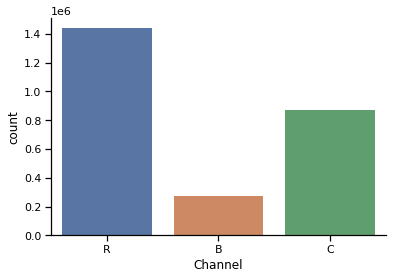

In [8]:
sns.countplot(x='Channel', data=df);
sns.despine()

* Categorical
* Assumes three values: Retail = 'R', Correspondent = 'C', Broker = 'B'
* Most of them are channel R

### Seller_Name
The name of the entity that delivered the mortgage loan to Fannie Mae.

In [9]:
df['Seller_Name'].head()

0                                   Quicken Loans Inc.
1    United Shore Financial Services, Llc Dba Unite...
2    United Shore Financial Services, LLC dba Unite...
3                       United Wholesale Mortgage, LLC
4                                   Quicken Loans Inc.
Name: Seller_Name, dtype: object

In [10]:
df['Seller_Name'].nunique()

55

In [11]:
sellers = (df['Seller_Name'].value_counts()).sort_values(ascending=False)[:10]

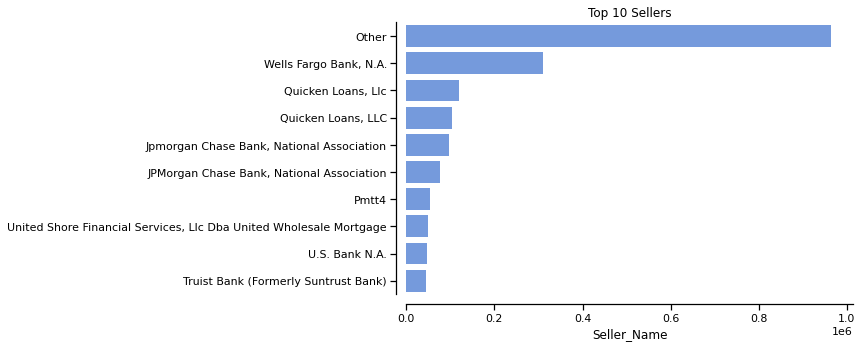

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(sellers, sellers.index, color='cornflowerblue');
plt.title('Top 10 Sellers');
sns.despine(offset=10);

* Categorical
* There 55 sellers categories

### Original_Interest_Rate
The original interest rate on a mortgage loan as identified in the original mortgage note.

In [13]:
df['Original_Interest_Rate'].describe()

count    2.580846e+06
mean     4.136184e+00
std      4.932804e-01
min      1.790000e+00
25%      3.875000e+00
50%      4.125000e+00
75%      4.490000e+00
max      6.125000e+00
Name: Original_Interest_Rate, dtype: float64

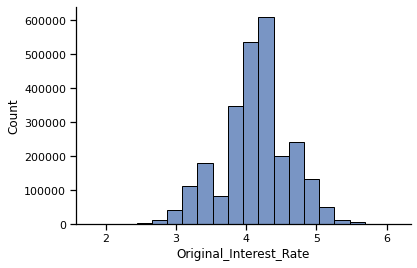

In [14]:
sns.histplot(df['Original_Interest_Rate'], bins=20);
sns.despine()

In [15]:
df['Original_Interest_Rate'].skew(), df['Original_Interest_Rate'].kurtosis()

(-0.18569382709852295, 0.21592025027094186)

* Numerical - Continuous
* Values from 1.79 to 6.12
* Data is fairly simmetrical

### Original_UPB
The dollar amount of the loan as stated on the note at the time the loan was originated.

In [16]:
df['Original_UPB'].describe()

count    2.580846e+06
mean     2.303957e+05
std      1.196219e+05
min      5.000000e+03
25%      1.390000e+05
50%      2.080000e+05
75%      3.020000e+05
max      1.223000e+06
Name: Original_UPB, dtype: float64

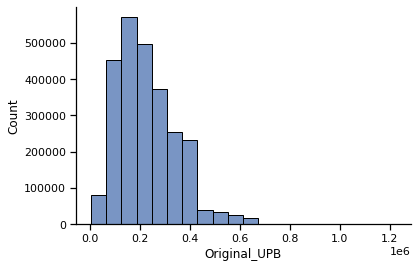

In [17]:
sns.histplot(df['Original_UPB'], bins=20);
sns.despine()

In [18]:
df['Original_UPB'].skew(), df['Original_UPB'].kurtosis()

(0.9169795220433988, 1.0055926411148057)

* Numerical, continuous
* High right skewness 

In [19]:
df.columns

Index(['Loan_ID', 'Channel', 'Seller_Name', 'Original_Interest_Rate',
       'Original_UPB', 'Original_Loan_Term', 'Origination_Date',
       'First_Payment_Date', 'LTV', 'CLTV', 'Number_of_Borrowers', 'DTI',
       'Borrower_Credit_Score', 'Co-Borrower_Credit_Score',
       'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type',
       'Number_of_Units', 'Occupancy_Status', 'Property_State', 'Zip',
       'Mortgage_Insurance_Per', 'count', 'foreclosure'],
      dtype='object')

### Original_Loan_Term
For fixed-rate, adjustable-rate and Interest-only mortgages, the number of months in which
regularly scheduled borrower payments are due at the time the loan was originated.

In [20]:
df['Original_Loan_Term'].describe()

count    2.580846e+06
mean     3.207924e+02
std      7.312856e+01
min      3.600000e+01
25%      3.600000e+02
50%      3.600000e+02
75%      3.600000e+02
max      3.600000e+02
Name: Original_Loan_Term, dtype: float64

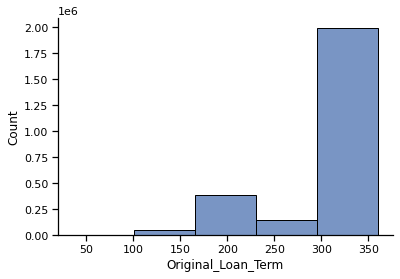

In [21]:
sns.histplot(df['Original_Loan_Term'], bins=5);
sns.despine()

* Numerical, discrete
* Values between 36 to 360 months
* Most loans are > 300

### Origination_Date
The date of each individual note.

In [22]:
df['Origination_Date'].sample(5)

1296862    72017.0
176875     22017.0
2461167    52017.0
1880663    92017.0
2004120    42017.0
Name: Origination_Date, dtype: float64

Date columns need some cleaning

In [23]:
df['Origination_Date'].isna().sum()

10

In [24]:
def process_date(date_str, key):
    """ Parse date string and return month/year value according to key parameter """
    date_str = date_str[:-2] # remove '.0'
    if key == 'month':
        month = date_str[:-4]
        return month
    elif key == 'year':
        year = date_str[-4:]
        return year
    else:
        raise ValueError("invalid key, only accepts 'month' or 'year'")

In [25]:
df['orig_month'] = df['Origination_Date'].astype(str).apply(lambda date: process_date(date, key='month'))
df['orig_year'] = df['Origination_Date'].astype(str).apply(lambda date: process_date(date, key='year'))

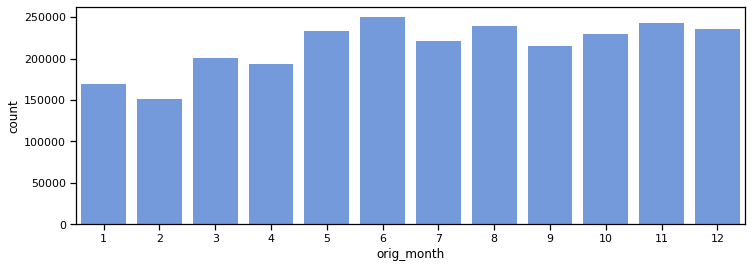

In [26]:
plt.figure(figsize=(12, 4))
sns.countplot(df['orig_month'], color='cornflowerblue', order=np.arange(1, 13).astype('str'));

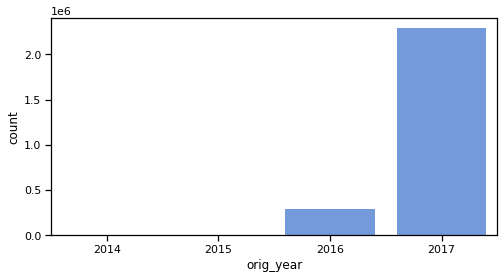

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(df['orig_year'], color='cornflowerblue', order=np.arange(2014, 2018).astype('str'));

* Date feature
* Has 10 missing values
* Year values are: 2014, 2015, 2016, 2017

### First_Payment_Date
The date of the first scheduled mortgage loan payment to be made by the borrower under the
terms of the mortgage loan documents.

In [28]:
df['first_payment_month'] = df['First_Payment_Date'].astype(str).apply(lambda date: process_date(date, key='month'))
df['first_payment_year'] = df['First_Payment_Date'].astype(str).apply(lambda date: process_date(date, key='year'))

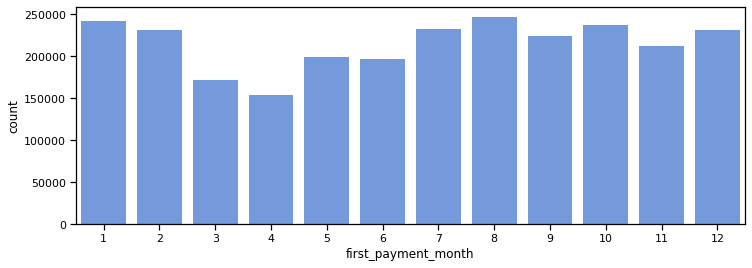

In [29]:
plt.figure(figsize=(12, 4))
sns.countplot(df['first_payment_month'], color='cornflowerblue', order=np.arange(1, 13).astype('str'));

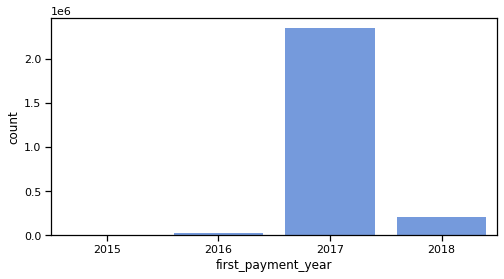

In [30]:
plt.figure(figsize=(8, 4))
sns.countplot(df['first_payment_year'], color='cornflowerblue', order=np.arange(2015, 2019).astype('str'));

* Date feature
* Year values are: 2015, 2016, 2017, 2018

In [31]:
df.columns

Index(['Loan_ID', 'Channel', 'Seller_Name', 'Original_Interest_Rate',
       'Original_UPB', 'Original_Loan_Term', 'Origination_Date',
       'First_Payment_Date', 'LTV', 'CLTV', 'Number_of_Borrowers', 'DTI',
       'Borrower_Credit_Score', 'Co-Borrower_Credit_Score',
       'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type',
       'Number_of_Units', 'Occupancy_Status', 'Property_State', 'Zip',
       'Mortgage_Insurance_Per', 'count', 'foreclosure', 'orig_month',
       'orig_year', 'first_payment_month', 'first_payment_year'],
      dtype='object')

### LTV, CLTV
LTV: The ratio, expressed as a percentage, obtained by dividing the amount of the loan at origination by
the value of the property.
\
CLTV: The ratio, expressed as a percentage, obtained by dividing the amount of all known outstanding loans at origination by the value of the property

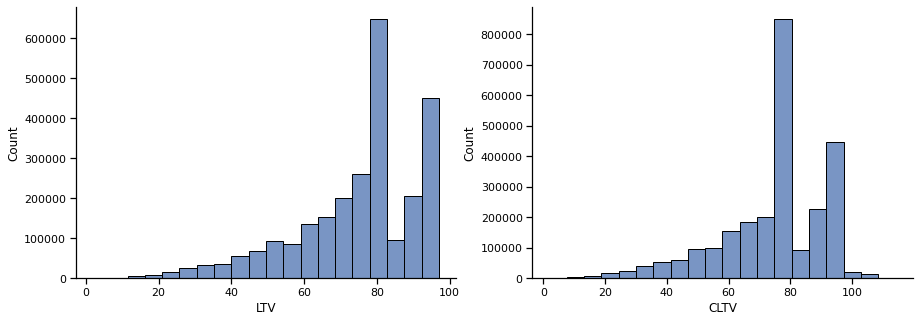

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['LTV'], ax=axes[0], bins=20);
sns.histplot(df['CLTV'], ax=axes[1], bins=20);
sns.despine()

* Numerical, discrete
* Values between 0 and 100 (percentage)

### Number_of_Borrowers
The number of individuals obligated to repay the mortgage loan.

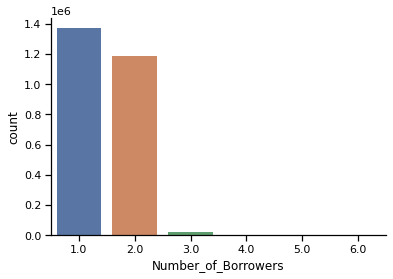

In [33]:
sns.countplot(df['Number_of_Borrowers']);
sns.despine()

* Numerical, discrete
* Values [1,6]

### DTI
The ratio obtained by dividing the total monthly debt expense by the total monthly income of the
borrower at the time the loan was originated.

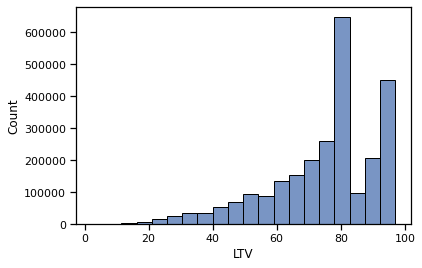

In [34]:
sns.histplot(df['LTV'], bins=20);

* Numerical, continuous

### Borrower_Credit_Score and Co-Borrower_Credit_Score
A numerical value used by the financial services industry to evaluate the quality of borrower credit.

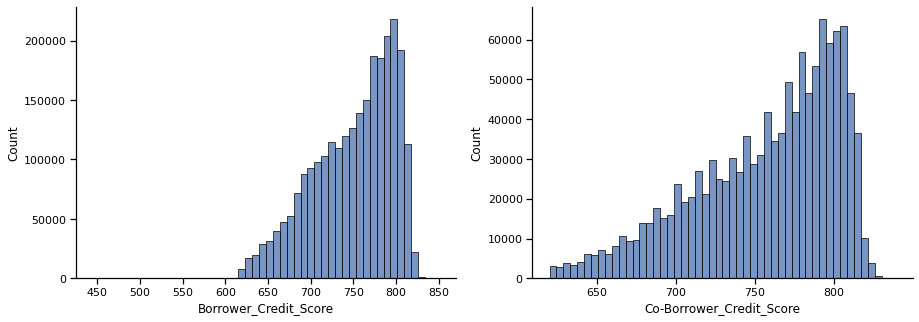

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Borrower_Credit_Score'], ax=axes[0], bins=50);
sns.histplot(df['Co-Borrower_Credit_Score'], ax=axes[1], bins=50);
sns.despine()

* Numerical, Continuous
* Co-Borrower hast many missing values (~50%)

### First_Time_Home_Buyer
An indicator that denotes if the borrower or co-borrower qualifies as a first-time homebuyer.

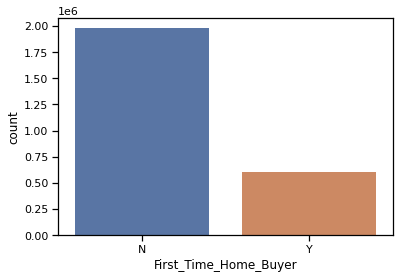

In [36]:
sns.countplot(df['First_Time_Home_Buyer']);

* Categorical
* Values: No (N), Yes (Y)

### Loan_Purpose
An indicator that denotes whether the mortgage loan is either a refinance mortgage or a purchase
money mortgage. Purpose may be the purchase of a new property or refinance of an existing lien
(with cash out or with no cash out).

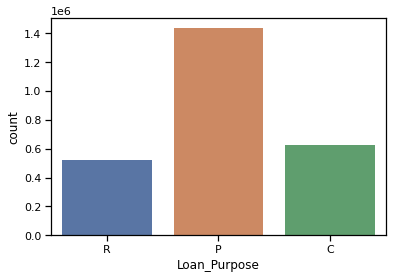

In [37]:
sns.countplot(df['Loan_Purpose']);

* Categorical
* Values: C (Cash-Out Refinance), R (Refinance), P (Purchase)

### Property_Type
An indicator that denotes whether the property type secured by the mortgage loan is a
condominium, co-operative, planned urban development (PUD), manufactured home, or single-
family home.

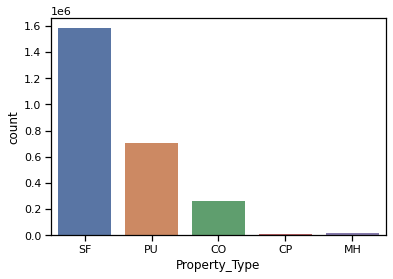

In [38]:
sns.countplot(df['Property_Type']);

* Categorical
* Values: SF = single-family home, PU = Planned Urban Development, CO = condominium, CP = co-operative, MH = manufacture home

### Number_of_Units
The number of units comprising the related mortgaged property (one, two, three, or four).

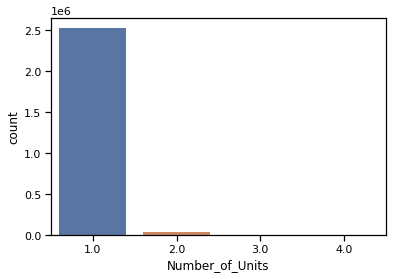

In [39]:
sns.countplot(df['Number_of_Units']);

* Numerical, discrete
* Most of rows are 1: not useful feature?

### Occupancy_Status
The classification describing the property occupancy status at the time the loan was originated.

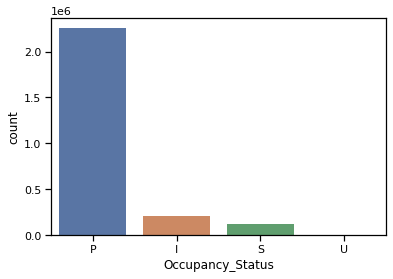

In [40]:
sns.countplot(df['Occupancy_Status']);

* Categorical
* Values: P (Principal), S (Second), I (Investor), U (Unknown)

### Property_State
A two-letter abbreviation indicating the state or territory within which the property securing the
mortgage loan is located.

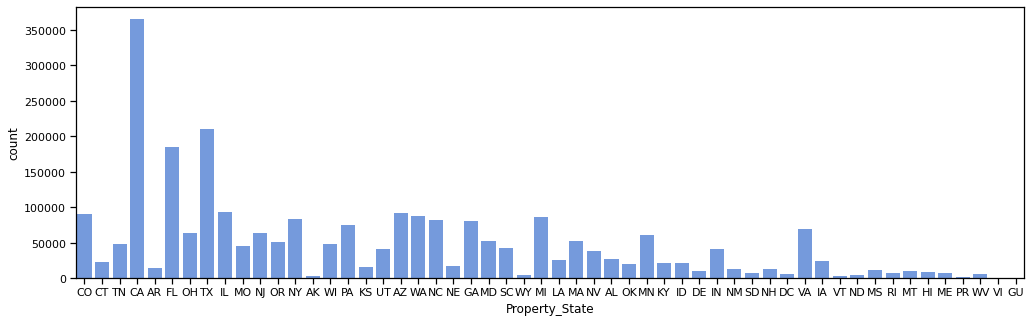

In [41]:
plt.figure(figsize=(17, 5))
sns.countplot(df['Property_State'], color='cornflowerblue');

In [42]:
df['Property_State'].nunique()

54

* Categorical
* 54 categories

### Zip
Limited to the first three digits of the code designated by the U.S. Postal Service where the subject
property is located.

In [43]:
df['Zip'].sample(10)

763307     970.0
2534504    752.0
833771     802.0
608881     662.0
343117     245.0
388442     770.0
2442757    972.0
265365     200.0
430056     300.0
1374060    740.0
Name: Zip, dtype: float64

In [44]:
df['Zip'].nunique()

900

* Numerical, discrete
* 900 values

### Mortgage_Insurance_Per
The original percentage of mortgage insurance coverage obtained for an insured conventional
mortgage loan and used following the occurrence of an event of default to calculate the insurance
benefit, as defined by the underlying master primary insurance policy.

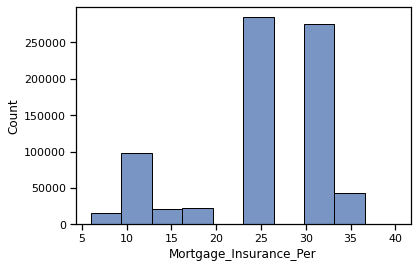

In [45]:
sns.histplot(df['Mortgage_Insurance_Per'], bins=10);

In [46]:
df['Mortgage_Insurance_Per'].isna().sum()/df.shape[0]

0.705416342484819

* Numerical, continuouos
* 70% missing

### foreclosure

In [47]:
df['foreclosure'].value_counts()

False    2579502
True        1354
Name: foreclosure, dtype: int64

* Target variable
* Very unbalanced

Let's categorize our features as numerical, categorical or date:

* Numerical: 'Original_Interest_Rate', 'Original_UPB', 'Original_Loan_Term', 'LTV', 'CLTV', 'Number_of_Borrowers', 'DTI', 'Borrower_Credit_Score', 'Co-Borrower_Credit_Score', 'Number_of_Units', 'Zip', 'Mortgage_Insurance_Per'

* Categorical: 'Channel', 'Seller_Name', 'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type', 'Occupancy_Status', 'Property_State', 'foreclosure'


* Date: 'Origination_Date', 'First_Payment_Date'

## Correlations

In [48]:
df.corr()['foreclosure'].sort_values(ascending=False)

foreclosure                 1.000000
CLTV                        0.016584
LTV                         0.016144
Original_Interest_Rate      0.016037
Original_Loan_Term          0.007408
Mortgage_Insurance_Per      0.005741
DTI                         0.005066
First_Payment_Date         -0.000290
Origination_Date           -0.000677
Loan_ID                    -0.001324
Zip                        -0.001347
Number_of_Units            -0.002375
Original_UPB               -0.011128
Number_of_Borrowers        -0.012343
Co-Borrower_Credit_Score   -0.014728
Borrower_Credit_Score      -0.020552
count                      -0.025677
Name: foreclosure, dtype: float64

### Numerical variables vs Target

In [49]:
numerical = ['Original_Interest_Rate', 'Original_UPB', 'Original_Loan_Term', 'LTV', 'CLTV', 'Number_of_Borrowers',
             'DTI', 'Borrower_Credit_Score', 'Co-Borrower_Credit_Score', 'Number_of_Units', 'Zip', 'Mortgage_Insurance_Per']

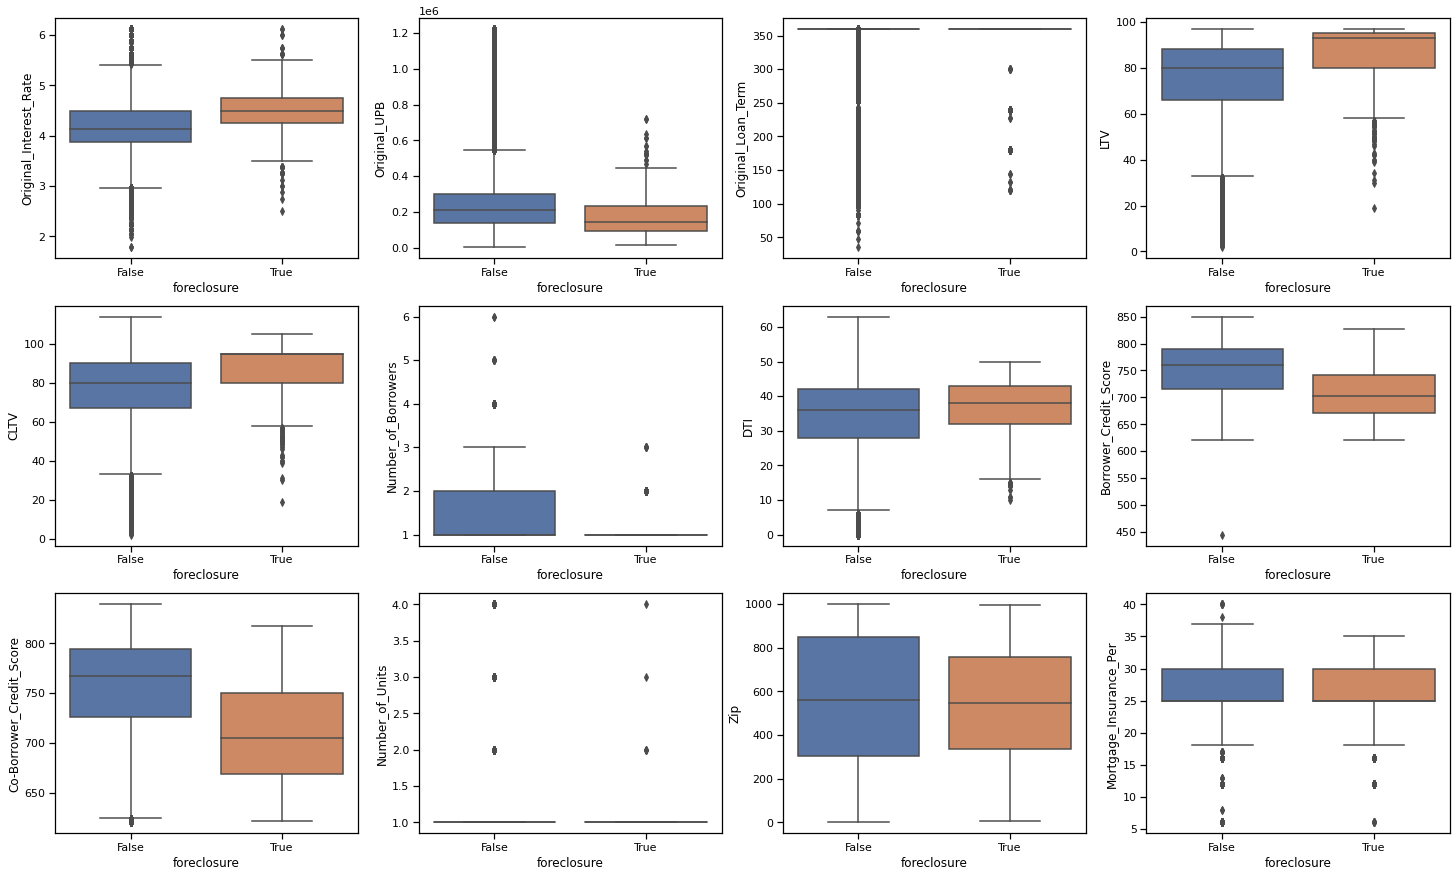

In [50]:
fig, axes = plt.subplots(3, 4, figsize=(25,15))
axes = axes.ravel()
for ind, col in enumerate(numerical):
    sns.boxplot(x='foreclosure', y=col, data=df, ax=axes[ind]);

### Categorical variables vs Target

In [59]:
categorical = ['Channel', 'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type', 'Occupancy_Status']

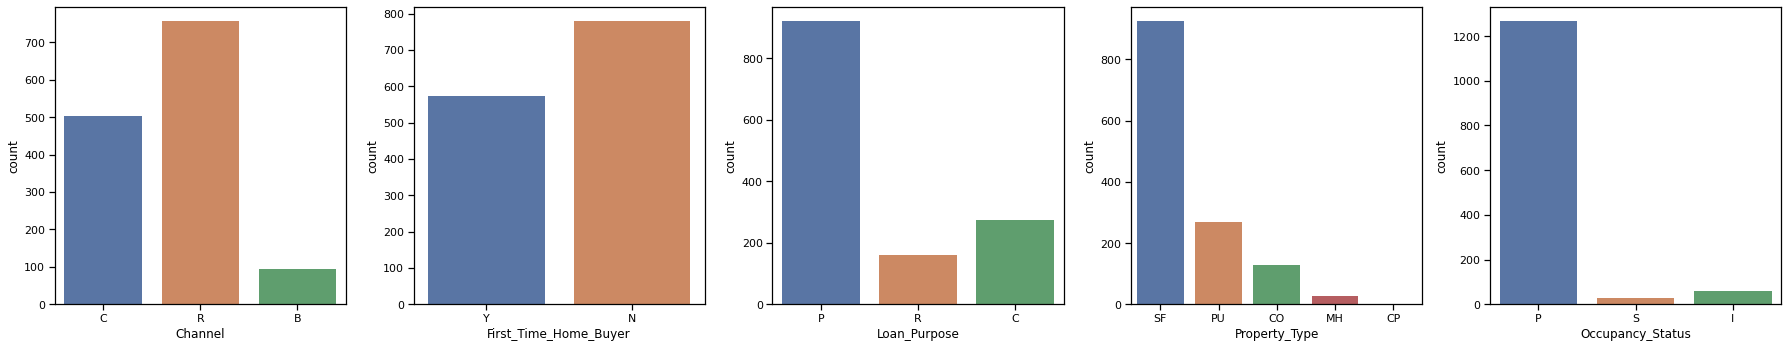

In [63]:
fig, axes = plt.subplots(1, 5, figsize=(25,5))
axes = axes.ravel()
for ind, col in enumerate(categorical):
    sns.countplot(x=col, data=df[df['foreclosure'] == True], ax=axes[ind]);
plt.tight_layout()

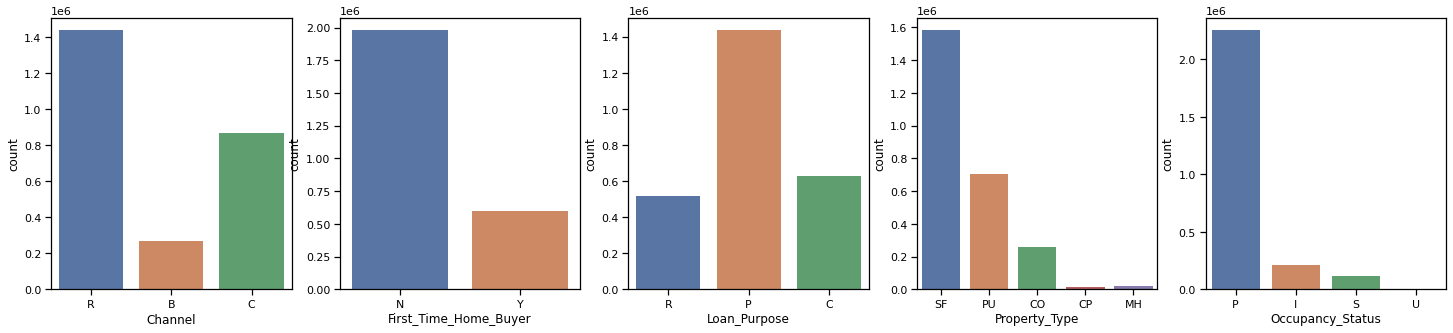

In [62]:
fig, axes = plt.subplots(1, 5, figsize=(25,5))
axes = axes.ravel()
for ind, col in enumerate(categorical):
    sns.countplot(x=col, data=df[df['foreclosure'] == False], ax=axes[ind]);

### Date features

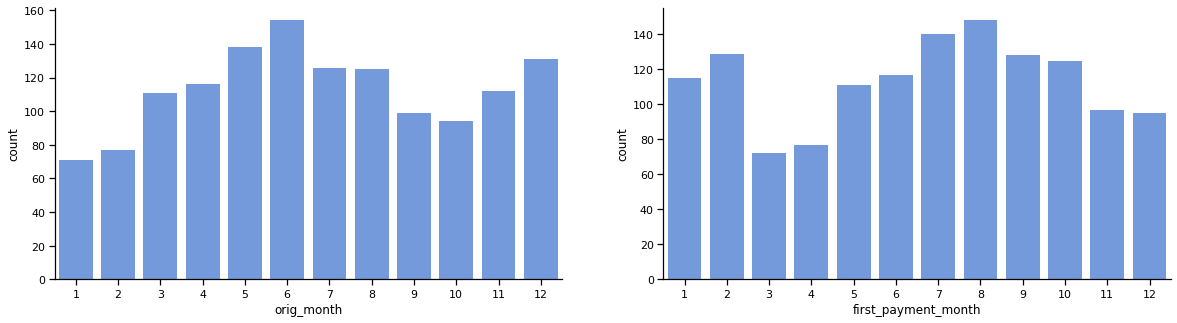

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='orig_month', data=df[df['foreclosure'] == True], order=np.arange(1,13).astype(str), color='cornflowerblue', ax=axes[0]);
sns.countplot(x='first_payment_month', data=df[df['foreclosure'] == True], order=np.arange(1,13).astype(str), color='cornflowerblue', ax=axes[1]);
sns.despine()

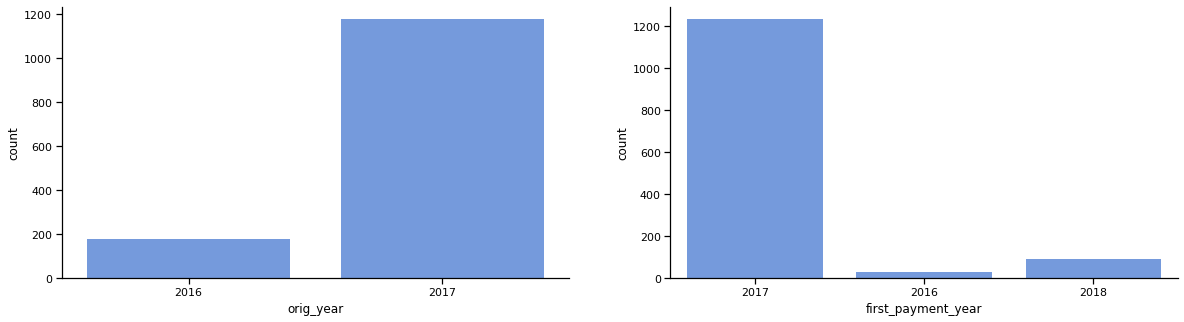

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='orig_year', data=df[df['foreclosure'] == True], color='cornflowerblue', ax=axes[0]);
sns.countplot(x='first_payment_year', data=df[df['foreclosure'] == True], color='cornflowerblue', ax=axes[1]);
sns.despine()